  <h1 style="margin-top:0; color:#2c3e50;">Office Supplier</h1>

<img src="https://img.freepik.com/free-vector/collection-office-stationery_53876-8062.jpg?semt=ais_hybrid&w=740&q=80"
     alt="Bike Store"
     style="float:right; width:250px; border-radius:8px; margin-left:15px;">


<hr style="border: none; height: 8px; background: linear-gradient(to right, #a100ff, #00d9ff); border-radius: 4px;">


## Importing Libraries (Toolkits)

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing & Inspecting Datasets

In [47]:
customer = pd.read_csv(r'C:\Users\Admin\Downloads\projects\projects\sales-dashboard-project\datasets\non-eu\Customers.csv')

### Customer Data Overview
  Each entry includes:

   - **Customer ID**: a unique code for each customer
   - **Customer Name**: full name of the customer

In [43]:
customer

,Customer ID,Customer Name
0,AA-10315,Alex Avila
1,AA-10375,Allen Armold
2,AA-10480,Andrew Allen
3,AA-10645,Anna Andreadi
4,AB-10015,Aaron Bergman
...,...,...
788,XP-21865,Xylona Preis
789,YC-21895,Yoseph Carroll
790,YS-21880,Yana Sorensen
791,ZC-21910,Zuschuss Carroll


In [ ]:
location = pd.read_csv(r'C:\Users\Admin\Downloads\projects\projects\sales-dashboard-project\datasets\non-eu\Location.csv')

### Location Data Overview

This dataset contains the geographic locations of customers.

Each entry includes:
- **Postal Code**
- **City**
- **State and Region**
- **Country**

The data covers customers across the **United States**, grouped into four main regions:
- **Central**
- **East**
- **South**
- **West**

In [44]:
location

,Postal Code,City,State,Region,Country/Region
0,76106.0,Fort Worth,Texas,Central,United States
1,53711.0,Madison,Wisconsin,Central,United States
2,68025.0,Fremont,Nebraska,Central,United States
3,77095.0,Houston,Texas,Central,United States
4,75080.0,Richardson,Texas,Central,United States
...,...,...,...,...,...
627,83301.0,Twin Falls,Idaho,West,United States
628,92672.0,San Clemente,California,West,United States
629,94568.0,Dublin,California,West,United States
630,93405.0,San Luis Obispo,California,West,United States


In [ ]:
product = pd.read_csv(
    r'C:\Users\Admin\Downloads\projects\projects\sales-dashboard-project\datasets\non-eu\Products.csv',
    encoding='ISO-8859-1',
    sep=';',
    engine='python',
    on_bad_lines='skip'
)

### Product Data Overview

This dataset shows the product catalog 

The store sells:
-  **Furniture**: chairs, tables, bookcases
-  **Office Supplies**: paper, binders, envelopes
-  **Technology**: phones, copiers, accessories

In [54]:
product


,Product ID,Category,Sub-Category,Product Name
0,FUR-BO-10000112,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry"
1,FUR-BO-10000330,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Plank..."
2,FUR-BO-10000362,Furniture,Bookcases,Sauder Inglewood Library Bookcases
3,FUR-BO-10000468,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases
4,FUR-BO-10000711,Furniture,Bookcases,"Hon Metal Bookcases, Gray"
...,...,...,...,...
1889,TEC-PH-10004912,Technology,Phones,Cisco SPA112 2 Port Phone Adapter
1890,TEC-PH-10004922,Technology,Phones,RCA Visys Integrated PBX 8-Line Router
1891,TEC-PH-10004924,Technology,Phones,"SKILCRAFT Telephone Shoulder Rest, 2"" x 6.5"" x..."
1892,TEC-PH-10004959,Technology,Phones,Classic Ivory AntiqueTelephoneZL1810


In [72]:
order = pd.read_csv(r'C:\Users\Admin\Downloads\projects\projects\sales-dashboard-project\datasets\non-eu\Orders.csv',parse_dates=['Order Date','Ship Date'])

## Preprocessing Data
## The Data Glance
---

In [69]:
order.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Postal Code,Product ID,Sales,Quantity,Discount,Profit
0,1,CA-2022-152156,08/11/2022,11/11/2022,Second Class,CG-12520,Consumer,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136
1,2,CA-2022-152156,08/11/2022,11/11/2022,Second Class,CG-12520,Consumer,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820
2,3,CA-2022-138688,12/06/2022,16/06/2022,Second Class,DV-13045,Corporate,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714
3,4,US-2021-108966,11/10/2021,18/10/2021,Standard Class,SO-20335,Consumer,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310
4,5,US-2021-108966,11/10/2021,18/10/2021,Standard Class,SO-20335,Consumer,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164


In [70]:
order.shape

(9994, 13)

In [56]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row ID       9994 non-null   int64  
 1   Order ID     9994 non-null   object 
 2   Order Date   9994 non-null   object 
 3   Ship Date    9994 non-null   object 
 4   Ship Mode    9994 non-null   object 
 5   Customer ID  9994 non-null   object 
 6   Segment      9994 non-null   object 
 7   Postal Code  9994 non-null   int64  
 8   Product ID   9994 non-null   object 
 9   Sales        9994 non-null   float64
 10  Quantity     9994 non-null   int64  
 11  Discount     9994 non-null   float64
 12  Profit       9994 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 1015.1+ KB


In [71]:
order[['Sales','Profit','Quantity','Discount']].describe().round(2)

,Sales,Profit,Quantity,Discount
count,9994.00,9994.00,9994.00,9994.00
mean,229.86,28.66,3.79,0.16
std,623.25,234.26,2.23,0.21
min,0.44,-6599.98,1.00,0.00
25%,17.28,1.73,2.00,0.00
50%,54.49,8.67,3.00,0.20
75%,209.94,29.36,5.00,0.20
max,22638.48,8399.98,14.00,0.80


In [77]:
order.isna().sum()

Row ID         0
Order ID       0
Order Date     0
Ship Date      0
Ship Mode      0
Customer ID    0
Segment        0
Postal Code    0
Product ID     0
Sales          0
Quantity       0
Discount       0
Profit         0
dtype: int64

In [83]:
order.duplicated().sum()

np.int64(0)

<hr style="border:none;height:8px;background:linear-gradient(to right,#00c6ff,#00ffcc);border-radius:4px;">


## Exploring & Analyzing Data

In [84]:
order.sample(15)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Postal Code,Product ID,Sales,Quantity,Discount,Profit
6482,6483,CA-2023-140872,03/06/2023,10/06/2023,Standard Class,NR-18550,Consumer,33024,TEC-AC-10002942,110.400,2,0.2,-4.1400
2051,2052,CA-2021-142237,11/07/2021,13/07/2021,First Class,CK-12595,Consumer,19134,FUR-CH-10003833,341.488,8,0.3,-73.1760
5774,5775,CA-2022-142398,12/04/2022,16/04/2022,Standard Class,BP-11290,Consumer,90036,FUR-CH-10001545,638.288,7,0.2,-31.9144
7646,7647,US-2020-115196,09/09/2020,13/09/2020,Standard Class,DL-12925,Consumer,27834,TEC-MA-10002073,1299.990,2,0.5,-571.9956
6325,6326,CA-2021-110289,29/10/2021,02/11/2021,Standard Class,NB-18655,Corporate,94109,OFF-EN-10001434,210.840,4,0.0,103.3116
6196,6197,CA-2023-113453,21/10/2023,28/10/2023,Standard Class,CM-12160,Consumer,19143,OFF-ST-10000352,71.376,3,0.2,-4.4610
30,31,US-2021-150630,17/09/2021,21/09/2021,Standard Class,TB-21520,Consumer,19140,OFF-EN-10001509,3.264,2,0.2,1.1016
2307,2308,CA-2023-116225,05/11/2023,09/11/2023,Standard Class,SV-20935,Consumer,10009,TEC-AC-10001432,390.750,5,0.0,171.9300
27,28,US-2021-150630,17/09/2021,21/09/2021,Standard Class,TB-21520,Consumer,19140,FUR-BO-10004834,3083.430,7,0.5,-1665.0522
1102,1103,US-2023-145863,21/04/2023,27/04/2023,Standard Class,RP-19390,Consumer,77041,OFF-BI-10004140,2.694,3,0.8,-4.7145


In [87]:
order['Sales'].describe().round(2)

count     9994.00
mean       229.86
std        623.25
min          0.44
25%         17.28
50%         54.49
75%        209.94
max      22638.48
Name: Sales, dtype: float64

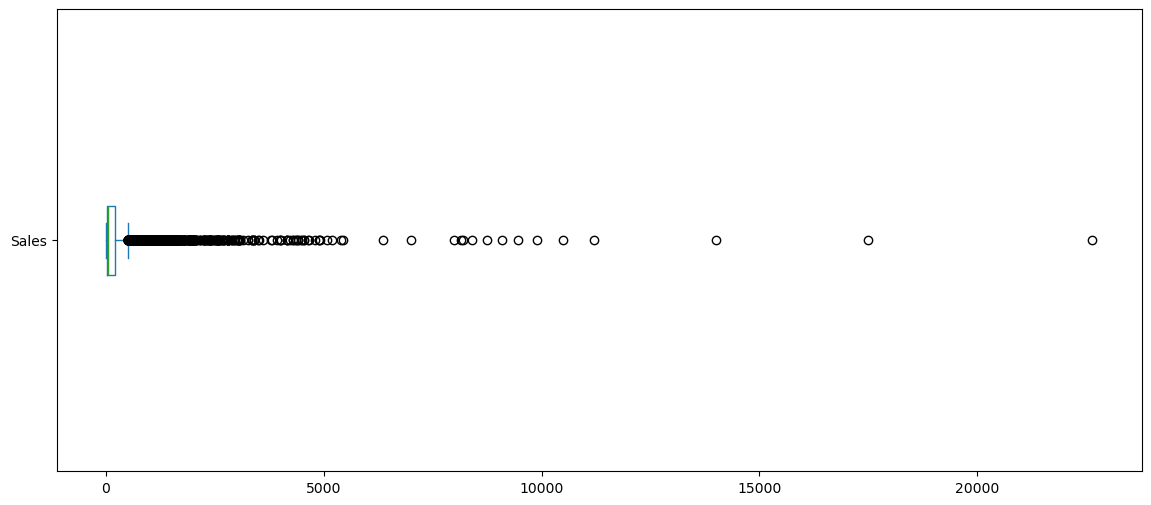

In [88]:
order['Sales'].plot(kind='box', vert=False, figsize=(14,6))
plt.show()

# Interpretation:
# Most of the sales are small ( close to zero on the left).
# the dots far away on the right side of the boxplot represent individual orders with large sales amounts (Outliers).
# maybe most sales are around $200–$500, but a few are $10,000, $15,000, or even $20,000.
# These large transactions are not typical — they happen rarely — but they can greatly increase total revenue.
# It means some customers made unusually large purchases compared to the majority.


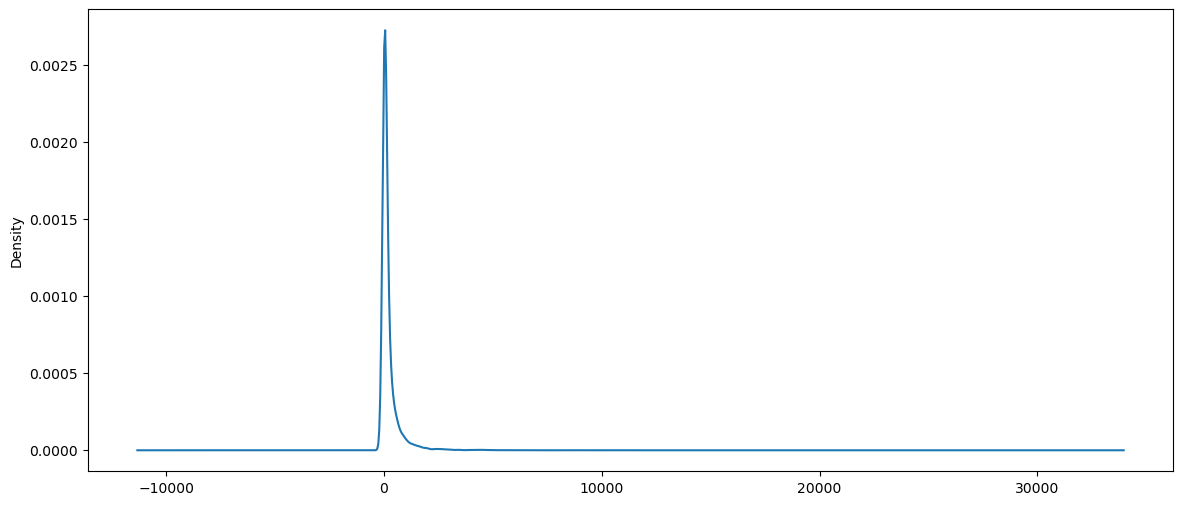

In [89]:
order['Sales'].plot(kind = 'density' , figsize =(14,6))
plt.show()

# The KDE curve shows the distribution of Sales values.
# Most products have low Sales, with a long Tail to right indicating a few expensive items.

In [93]:
order[order['Sales']<0]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Postal Code,Product ID,Sales,Quantity,Discount,Profit


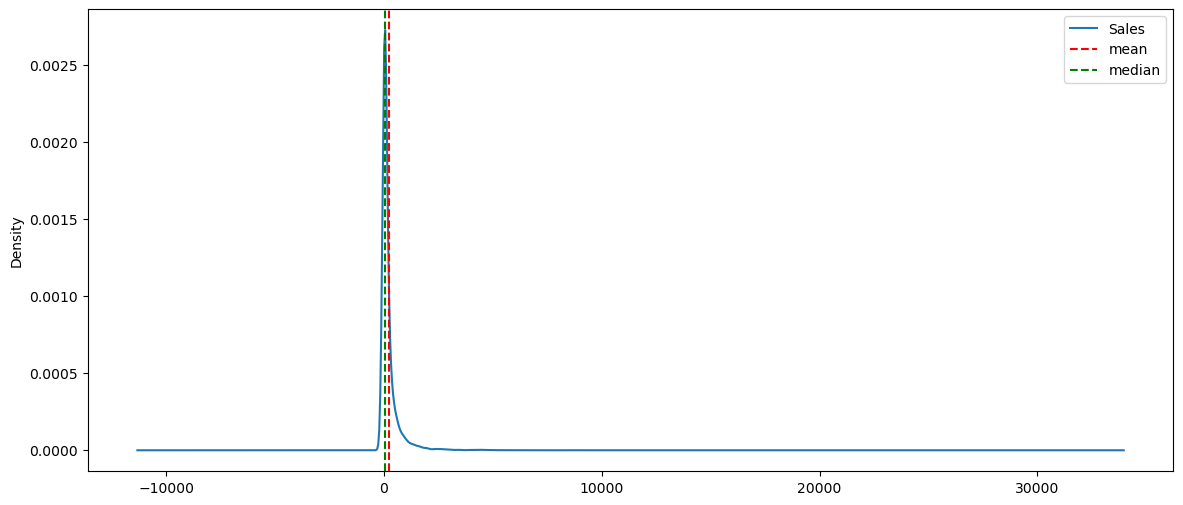

In [94]:
ax = order['Sales'].plot(kind='density', figsize=(14,6))
ax.axvline(order['Sales'].mean(),color='red',linestyle ='--',label='mean')
ax.axvline(order['Sales'].median(),color='green',linestyle ='--',label = 'median')
ax.legend()
plt.show()

#The KDE chart shows a right-skewed distribution, most sales are low with a few sales outliers.
#The mean (red line) is slightly higher than the median (green line).
#This indicates that the average sales is influenced by a small number of expensive products.

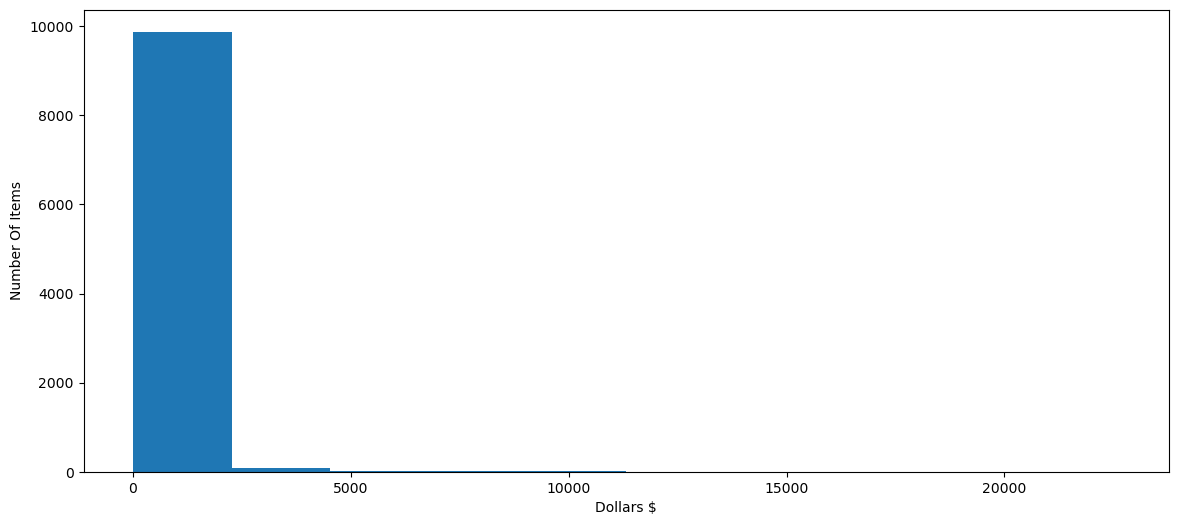

In [95]:
ax = order['Sales'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number Of Items')
ax.set_xlabel('Dollars $')
plt.show()

#Tall bar on the left => many cheap items.
#Long thin tail on the right => few expensive items

In [97]:
order[['Sales','Profit']].corr()

# The correlation between Sales and Profit is ~ 0.48 (moderate positive relationship).
# This means as Sales increase, Profit tends to increase as well,
# but not in a perfectly linear way.
# The correlation is not very high, which suggests that some high sales transactions

,Sales,Profit
Sales,1.000000,0.479064
Profit,0.479064,1.000000


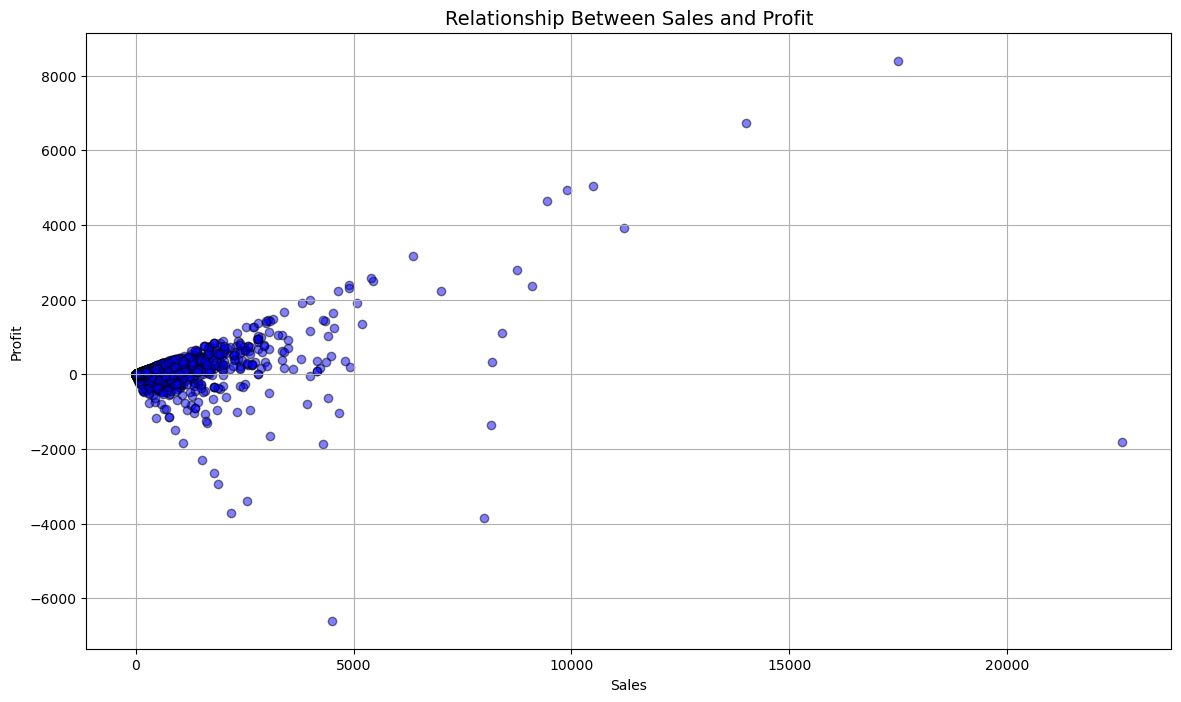

In [114]:
plt.figure(figsize=(14,8))
plt.scatter(order['Sales'], order['Profit'], alpha=0.5, color='blue', edgecolors='k')
plt.title('Relationship Between Sales and Profit', fontsize=14)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# These negative profit values indicate that some transactions resulted in a loss — 
# meaning the selling price was lower than the total cost or discounts were too high.

In [104]:
order[['Profiy','Discount']].corr()

,Profit,Discount
Profit,1.000000,-0.219487
Discount,-0.219487,1.000000


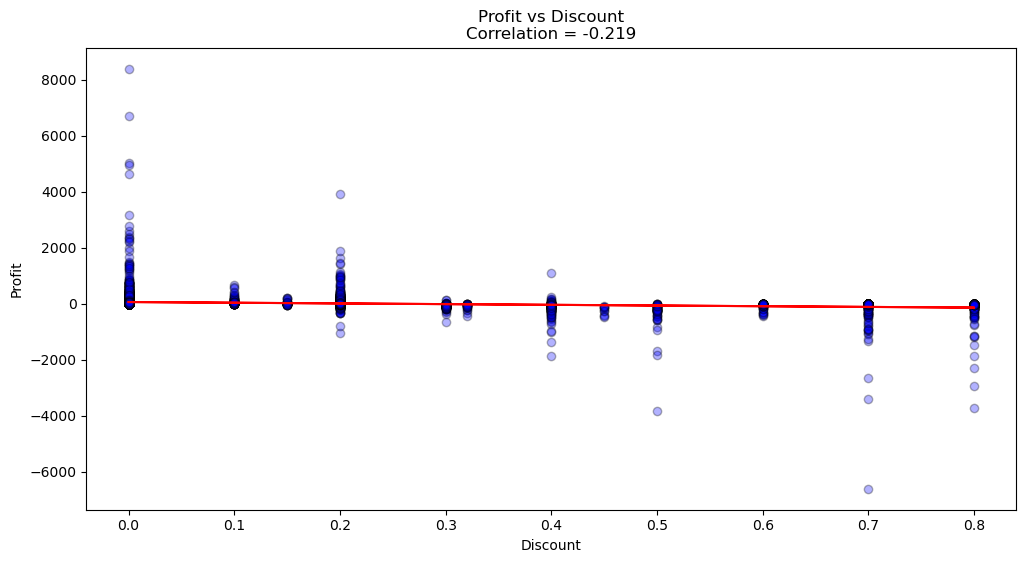

In [118]:
plt.figure(figsize=(12,6))
plt.scatter(order['Discount'], order['Profit'], color='blue', alpha=0.3,edgecolor='k')
z = np.polyfit(order['Discount'], order['Profit'], 1) 
p = np.poly1d(z)
plt.plot(order['Discount'], p(order['Discount']), color='red')
plt.title('Profit vs Discount\nCorrelation = {:.3f}'.format(order[['Profit','Discount']].corr().iloc[0,1]))
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

#  Each green dot represents a single order
#  Red line shows the relation between Profit and Discount
#  Negative correlation ~ -0.22 => higher discount slightly reduces profit
#  Dots above the line: orders with higher profit than expected for their discount
#  Dots below the line: orders with lower profit than expected
#  Trend is weak but visible → discounts generally reduce profit, but other factors also matter


In [123]:
order.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Postal Code,Product ID,Sales,Quantity,Discount,Profit
0,1,CA-2022-152156,08/11/2022,11/11/2022,Second Class,CG-12520,Consumer,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136
1,2,CA-2022-152156,08/11/2022,11/11/2022,Second Class,CG-12520,Consumer,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820
2,3,CA-2022-138688,12/06/2022,16/06/2022,Second Class,DV-13045,Corporate,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714
3,4,US-2021-108966,11/10/2021,18/10/2021,Standard Class,SO-20335,Consumer,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310
4,5,US-2021-108966,11/10/2021,18/10/2021,Standard Class,SO-20335,Consumer,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164


In [126]:
# Show orders with negative profit
negative_profit = order[order['Profit'] < 0]
print(negative_profit[['Order ID','Quantity','Sales','Discount','Profit']])


            Order ID  Quantity      Sales  Discount     Profit
3     US-2021-108966         5   957.5775      0.45  -383.0310
14    US-2021-118983         5    68.8100      0.80  -123.8580
15    US-2021-118983         3     2.5440      0.80    -3.8160
23    US-2023-156909         2    71.3720      0.30    -1.0196
27    US-2021-150630         7  3083.4300      0.50 -1665.0522
...              ...       ...        ...       ...        ...
9920  CA-2022-149272         7    22.3860      0.80   -35.8176
9921  CA-2020-111360         3     5.7420      0.70    -4.5936
9931  CA-2021-104948         4   683.3320      0.15   -40.1960
9937  CA-2022-164889         2    71.0880      0.20    -1.7772
9962  CA-2021-168088         4   383.4656      0.32   -67.6704

[1871 rows x 5 columns]


In [142]:
# Calculate Unit_Cost
order['Unit_Cost'] = (order['Sales'] - order['Profit']) / order['Quantity']
negative_profit_orders = order[order['Profit'] < 0]
print(negative_profit_orders[['Order ID', 'Quantity', 'Sales', 'Profit', 'Unit_Cost']])


            Order ID  Quantity      Sales     Profit  Unit_Cost
3     US-2021-108966         5   957.5775  -383.0310   268.1217
14    US-2021-118983         5    68.8100  -123.8580    38.5336
15    US-2021-118983         3     2.5440    -3.8160     2.1200
23    US-2023-156909         2    71.3720    -1.0196    36.1958
27    US-2021-150630         7  3083.4300 -1665.0522   678.3546
...              ...       ...        ...        ...        ...
9920  CA-2022-149272         7    22.3860   -35.8176     8.3148
9921  CA-2020-111360         3     5.7420    -4.5936     3.4452
9931  CA-2021-104948         4   683.3320   -40.1960   180.8820
9937  CA-2022-164889         2    71.0880    -1.7772    36.4326
9962  CA-2021-168088         4   383.4656   -67.6704   112.7840

[1871 rows x 5 columns]


In [150]:
# Calculate Unit Price (revenue per item after discount)
order['Unit_Price'] = order['Sales'] / order['Quantity']
negative_profit_orders = order[order['Profit'] < 0]
negative_profit_orders[['Order ID', 'Quantity', 'Sales', 'Profit','Discount', 'Unit_Cost','Unit_Price']]

# Insight: High discounts on expensive items can turn profitable orders into losses
# Recommendation: Monitor high-discount orders, consider discount limits or cost optimization

,Order ID,Quantity,Sales,Profit,Discount,Unit_Cost,Unit_Price
3,US-2021-108966,5,957.5775,-383.0310,0.45,268.1217,191.5155
14,US-2021-118983,5,68.8100,-123.8580,0.80,38.5336,13.7620
15,US-2021-118983,3,2.5440,-3.8160,0.80,2.1200,0.8480
23,US-2023-156909,2,71.3720,-1.0196,0.30,36.1958,35.6860
27,US-2021-150630,7,3083.4300,-1665.0522,0.50,678.3546,440.4900
...,...,...,...,...,...,...,...
9920,CA-2022-149272,7,22.3860,-35.8176,0.80,8.3148,3.1980
9921,CA-2020-111360,3,5.7420,-4.5936,0.70,3.4452,1.9140
9931,CA-2021-104948,4,683.3320,-40.1960,0.15,180.8820,170.8330
9937,CA-2022-164889,2,71.0880,-1.7772,0.20,36.4326,35.5440


## Historical Analyzing

In [151]:
order.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Postal Code,Product ID,Sales,Quantity,Discount,Profit,Unit_Cost,Unit_Price
0,1,CA-2022-152156,08/11/2022,11/11/2022,Second Class,CG-12520,Consumer,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,110.0232,130.9800
1,2,CA-2022-152156,08/11/2022,11/11/2022,Second Class,CG-12520,Consumer,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,170.7860,243.9800
2,3,CA-2022-138688,12/06/2022,16/06/2022,Second Class,DV-13045,Corporate,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,3.8743,7.3100
3,4,US-2021-108966,11/10/2021,18/10/2021,Standard Class,SO-20335,Consumer,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,268.1217,191.5155
4,5,US-2021-108966,11/10/2021,18/10/2021,Standard Class,SO-20335,Consumer,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,9.9258,11.1840


## At the annual level

In [155]:
order['Order Date'] = pd.to_datetime(order['Order Date'],dayfirst=True)

In [156]:
order['Year'] = order['Order Date'].dt.year

In [158]:
order['Year'].value_counts().sort_index()

Year
2020    1993
2021    2102
2022    2587
2023    3312
Name: count, dtype: int64

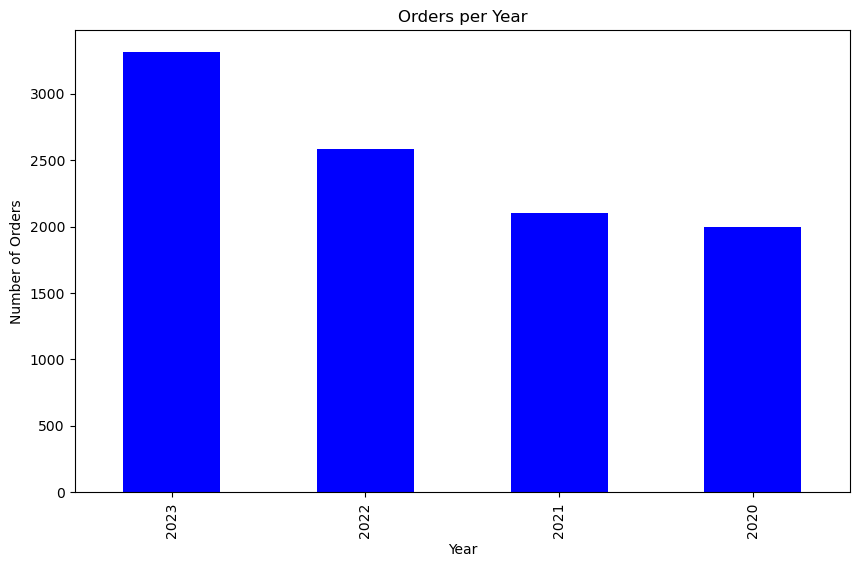

In [167]:
order['Year'].value_counts().sort_index(ascending=False).plot(kind='bar',color='blue',figsize=(10,6))
plt.title('Orders per Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.show()

In [169]:
# Sum of sales per year
yearly_sales = order.groupby('Year')['Sales'].sum().round()
print(yearly_sales)


Year
2020    484247.0
2021    470533.0
2022    609206.0
2023    733215.0
Name: Sales, dtype: float64


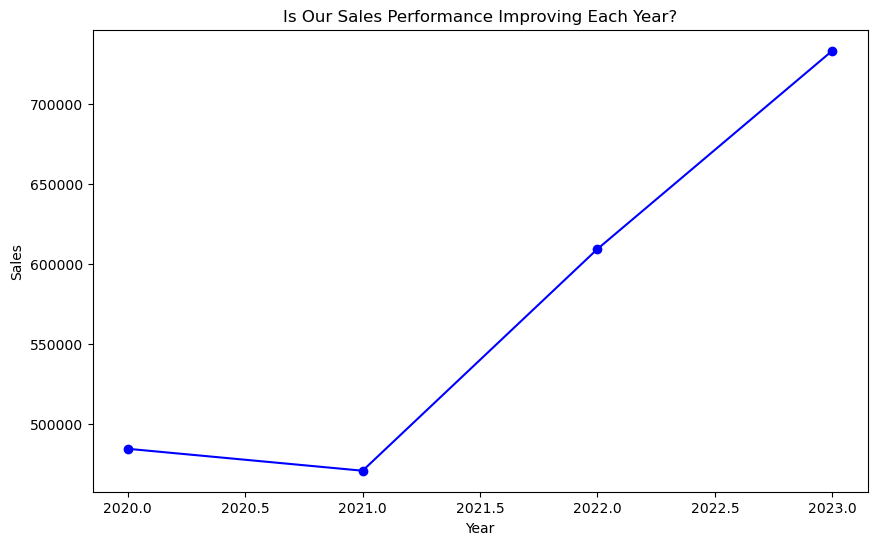

In [201]:
yearly_sales.plot(kind='line', marker='o', color='blue', figsize=(10,6))
plt.title('Is Our Sales Performance Improving Each Year?')
plt.ylabel('Sales')
plt.xlabel('Year')
plt.show()

In [174]:
# Calculate YOY growth 
yoy = yearly_sales.pct_change() * 100  # =>> YOY growth = Current Year Sales − Previous Year Sales / Previous Year Sales 
print(yoy)


Year
2020          NaN
2021    -2.832026
2022    29.471472
2023    20.355840
Name: Sales, dtype: float64


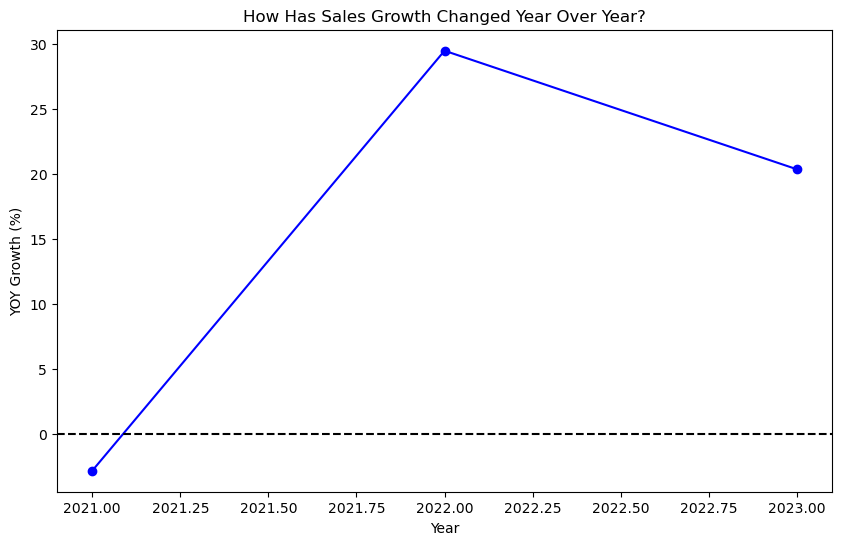

In [187]:
yoy.plot(kind='line', marker='o', color='blue', figsize=(10,6))
plt.title('How Has Sales Growth Changed Year Over Year?')
plt.ylabel('YOY Growth (%)')
plt.xlabel('Year')
plt.axhline(0, color='black', linestyle='--')
plt.show()

#  Positive YOY => sales increased compared to previous year
#  Negative YOY => sales decreased compared to previous year
#  Zero line shows no growth

## On A Monthly level

In [195]:
order['Month'] = order['Order Date'].dt.month

In [197]:
order['Month'].value_counts().sort_index()

Month
1      381
2      300
3      696
4      668
5      735
6      717
7      710
8      706
9     1383
10     819
11    1471
12    1408
Name: count, dtype: int64

In [198]:
# Sum of sales per month
monthly_sales = order.groupby('Month')['Sales'].sum().round()
print(monthly_sales)


Month
1      94925.0
2      59751.0
3     205005.0
4     137762.0
5     155029.0
6     152719.0
7     147238.0
8     159044.0
9     307650.0
10    200323.0
11    352461.0
12    325294.0
Name: Sales, dtype: float64


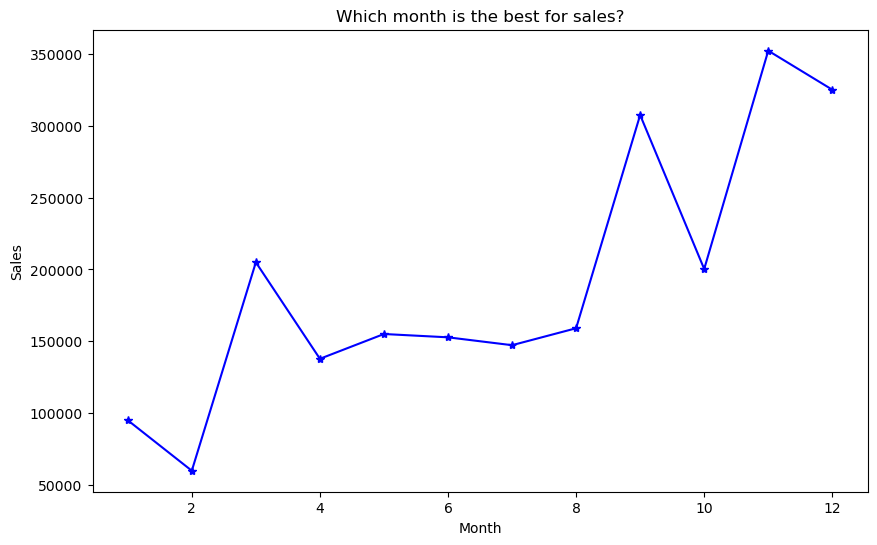

In [203]:
monthly_sales.plot(kind='line', marker='*', color='blue', figsize=(10,6))
plt.title('Which month is the best for sales?')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

In [205]:
# Calculate YOY growth 
mom = monthly_sales.pct_change() * 100  # =>> MOM growth = Current Month Sales − Previous Month Sales / Previous Month Sales 
print(mom)


Month
1            NaN
2     -37.054517
3     243.098860
4     -32.800663
5      12.533935
6      -1.490044
7      -3.588944
8       8.018310
9      93.437036
10    -34.886072
11     75.946347
12     -7.707803
Name: Sales, dtype: float64


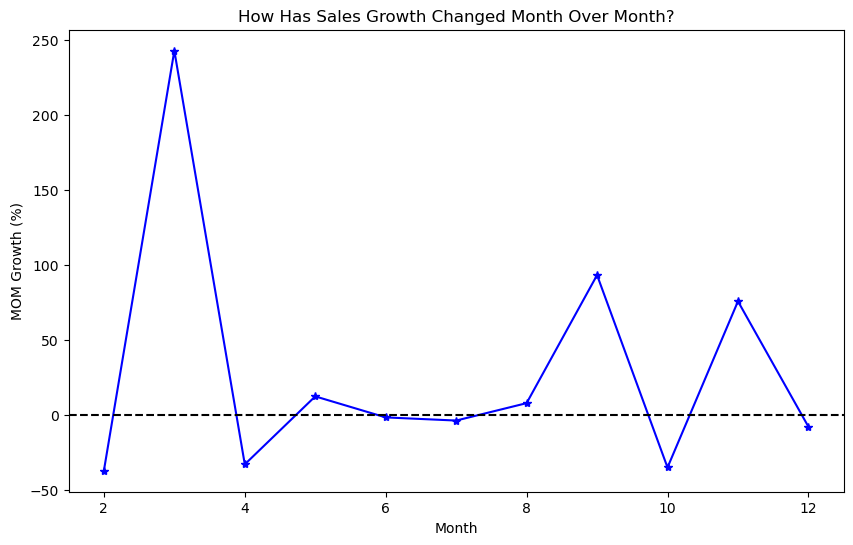

In [207]:
mom.plot(kind='line', marker='*', color='blue', figsize=(10,6))
plt.title('How Has Sales Growth Changed Month Over Month?')
plt.ylabel('MOM Growth (%)')
plt.xlabel('Month')
plt.axhline(0, color='black', linestyle='--')
plt.show()

#  Positive MOM => sales increased compared to previous month
#  Negative MOM => sales decreased compared to previous month
#  Zero line shows no growth
# There’s a major positive spike (around +240%) early in the year
# several months show negative growth, indicating sales drop compared to the previous month.
# Overall, sales performance is unstable month to month — suggesting that external factors or uneven demand affect monthly sales.

Correlation (MOM vs Avg Discount): 0.025
Correlation (MOM vs Order Count): 0.081


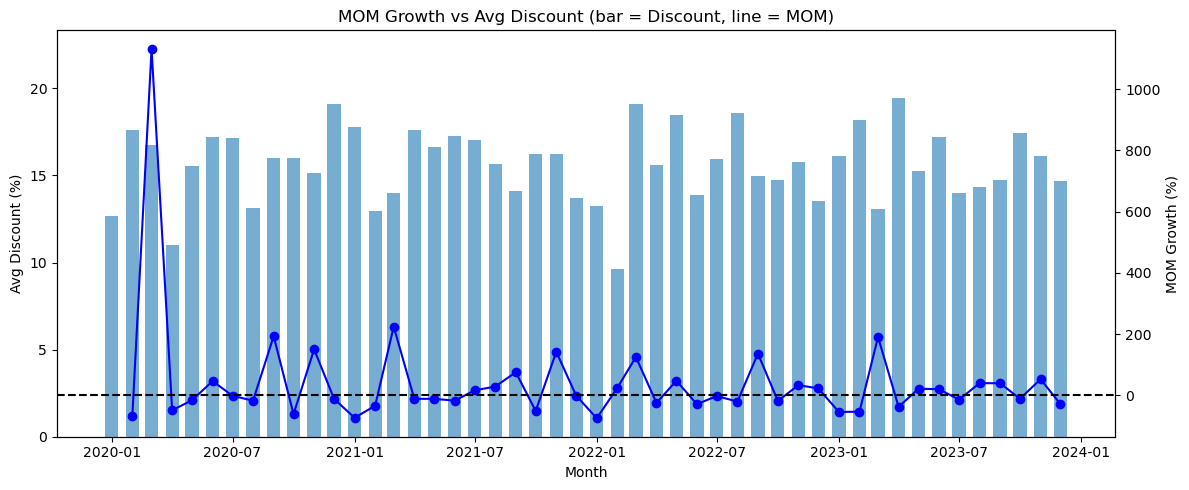

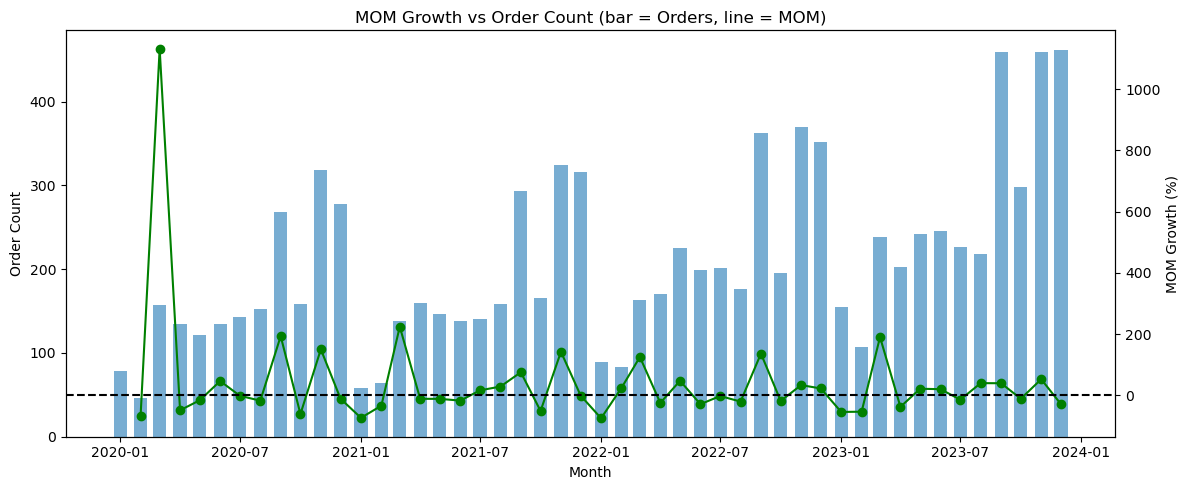

                Sales  Discount  Order_Count      MOM
Order Date                                           
2020-01-01   14236.90      0.13           79      NaN
2020-02-01    4519.89      0.18           46   -68.25
2020-03-01   55691.01      0.17          157  1132.13
2020-04-01   28295.34      0.11          135   -49.19
2020-05-01   23648.29      0.16          122   -16.42
2020-06-01   34595.13      0.17          135    46.29
2020-07-01   33946.39      0.17          143    -1.88
2020-08-01   27909.47      0.13          153   -17.78
2020-09-01   81777.35      0.16          268   193.01
2020-10-01   31453.39      0.16          159   -61.54
2020-11-01   78628.72      0.15          318   149.98
2020-12-01   69545.62      0.19          278   -11.55
2021-01-01   18174.08      0.18           58   -73.87
2021-02-01   11951.41      0.13           64   -34.24
2021-03-01   38726.25      0.14          138   224.03
2021-04-01   34195.21      0.18          160   -11.70
2021-05-01   30131.69      0

In [208]:
# 1) Build monthly summary
monthly = order.groupby(order['Order Date'].dt.to_period('M')).agg({
    'Sales': 'sum',
    'Discount': 'mean',
    'Order ID': 'count'   # count of orders
}).rename(columns={'Order ID': 'Order_Count'})

# convert index to timestamp (so plotting shows readable months)
monthly.index = monthly.index.to_timestamp()

# 2) MOM growth (%) on Sales
monthly['MOM'] = monthly['Sales'].pct_change() * 100

# 3) Quick numeric check: correlations
corr_discount = monthly['MOM'].corr(monthly['Discount'])
corr_orders = monthly['MOM'].corr(monthly['Order_Count'])

print('Correlation (MOM vs Avg Discount):', round(corr_discount, 3))
print('Correlation (MOM vs Order Count):', round(corr_orders, 3))

# 4) Plot 1: MOM vs Average Discount (twin axis)
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.bar(monthly.index, monthly['Discount']*100, width=20, alpha=0.6)   # discount as % (0.1 -> 10%)
ax1.set_ylabel('Avg Discount (%)')
ax1.set_ylim(0, monthly['Discount'].max()*100*1.2)

ax2 = ax1.twinx()
ax2.plot(monthly.index, monthly['MOM'], marker='o', color='blue')
ax2.set_ylabel('MOM Growth (%)')
ax2.axhline(0, color='black', linestyle='--')
ax1.set_title('MOM Growth vs Avg Discount (bar = Discount, line = MOM)')
ax1.set_xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5) Plot 2: MOM vs Order Count (twin axis)
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.bar(monthly.index, monthly['Order_Count'], width=20, alpha=0.6)
ax1.set_ylabel('Order Count')

ax2 = ax1.twinx()
ax2.plot(monthly.index, monthly['MOM'], marker='o', color='green')
ax2.set_ylabel('MOM Growth (%)')
ax2.axhline(0, color='black', linestyle='--')
ax1.set_title('MOM Growth vs Order Count (bar = Orders, line = MOM)')
ax1.set_xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6) Optionally print the monthly table to inspect
print(monthly[['Sales','Discount','Order_Count','MOM']].round(2))
